In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
#The LA AirBnB data(listings.csv) is from http://insideairbnb.com/get-the-data.html
AirBnB_data = pd.read_csv("listings.csv",low_memory=False)
crime_data = pd.read_csv("crime_counts_2019.csv")

In [3]:
merged_data = pd.merge(AirBnB_data, crime_data, how="left", on="city")
merged_data

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month,crime,year
0,109,https://www.airbnb.com/rooms/109,20191205175409,2019-12-06,Amazing bright elegant condo park front *UPGRA...,"*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...","*** Unit upgraded with new bamboo flooring, br...",none,NaN,...,strict_14_with_grace_period,t,f,1,1,0,0,0.02,10911.0,2019.0
1,344,https://www.airbnb.com/rooms/344,20191205175409,2019-12-06,Family perfect;Pool;Near Studios!,This home is perfect for families; aspiring ch...,"Cheerful & comfortable; near studios, amusemen...",This home is perfect for families; aspiring ch...,none,Quiet-yet-close to all the fun in LA! Hollywoo...,...,flexible,f,f,1,1,0,0,0.19,8775.0,2019.0
2,2708,https://www.airbnb.com/rooms/2708,20191205175409,2019-12-06,Mirrored Mini-Suite with Fireplace - W. Hollywood,Our best memory foam pillows you'll ever sleep...,Flickering fireplace. Blendtec® Designer 625 ...,Our best memory foam pillows you'll ever sleep...,none,We are minutes away from the Mentor Language I...,...,strict_14_with_grace_period,f,f,2,0,2,0,0.33,47879.0,2019.0
3,2732,https://www.airbnb.com/rooms/2732,20191205175409,2019-12-06,Zen Life at the Beach,NaN,This is a three story townhouse with the follo...,This is a three story townhouse with the follo...,none,NaN,...,strict_14_with_grace_period,f,f,2,1,1,0,0.19,7166.0,2019.0
4,2864,https://www.airbnb.com/rooms/2864,20191205175409,2019-12-07,*Upscale Professional Home with Beautiful Studio*,Centrally located.... Furnished with 42 inch S...,The space is furnished with Thomasville furnit...,Centrally located.... Furnished with 42 inch S...,none,What makes the neighborhood unique is that the...,...,strict_14_with_grace_period,f,f,1,1,0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40120,40599772,https://www.airbnb.com/rooms/40599772,20191205175409,2019-12-06,Bright Spacious two bedroom apartment by the b...,Brand new spacious apartment! this two bedroom...,"the apartment is more than 1200sqft, has two b...",Brand new spacious apartment! this two bedroom...,none,NaN,...,strict_14_with_grace_period,f,f,1,1,0,0,NaN,NaN,NaN
40121,40599853,https://www.airbnb.com/rooms/40599853,20191205175409,2019-12-06,Studio near the beach,Beautiful modern studio apartment located in M...,Full kitchen equipped for all your cooking nee...,Beautiful modern studio apartment located in M...,none,"Venice beach, Venice canals, the Santa Monica ...",...,moderate,f,f,2,2,0,0,NaN,NaN,NaN
40122,40601503,https://www.airbnb.com/rooms/40601503,20191205175409,2019-12-06,Cozy Studio maximum 4 person near many attract...,NaN,NaN,NaN,none,NaN,...,flexible,f,f,3,3,0,0,NaN,NaN,NaN
40123,40601789,https://www.airbnb.com/rooms/40601789,20191205175409,2019-12-06,Hollywood Classic Bungalow,Heart of Hollywood Bungalow central to the bes...,Heart of Hollywood Bungalow central to the bes...,Heart of Hollywood Bungalow central to the bes...,none,There is an amazing pilates studio right in th...,...,moderate,f,f,3,3,0,0,NaN,47879.0,2019.0


In [4]:
#drop unnecessary columns
merged_data=merged_data[['id','host_id','host_response_time','host_response_rate','host_is_superhost','host_listings_count','street','neighbourhood','neighbourhood_cleansed','neighbourhood_group_cleansed','city','state','zipcode','market','smart_location','country_code','country','latitude','longitude','property_type','room_type','accommodates','bathrooms','bedrooms','beds','square_feet','price','weekly_price','monthly_price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','maximum_nights','calendar_updated','availability_30','availability_60','availability_90','availability_365','number_of_reviews','review_scores_rating','review_scores_accuracy','review_scores_cleanliness','review_scores_checkin','review_scores_location','reviews_per_month','crime','year']]
merged_data

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year
0,109,521,NaN,NaN,f,1.0,"Culver City, CA, United States",Culver City,Culver City,Other Cities,...,248,2,80.0,10.0,10.0,6.0,10.0,0.02,10911.0,2019.0
1,344,767,within a few hours,100%,f,1.0,"Burbank, CA, United States",Burbank,Burbank,Other Cities,...,62,8,97.0,10.0,10.0,10.0,10.0,0.19,8775.0,2019.0
2,2708,3008,within a few hours,100%,t,2.0,"Los Angeles, CA, United States",Hollywood,Hollywood,City of Los Angeles,...,252,22,98.0,10.0,10.0,10.0,10.0,0.33,47879.0,2019.0
3,2732,3041,within a few hours,100%,t,2.0,"Santa Monica, CA, United States",Santa Monica,Santa Monica,Other Cities,...,344,20,94.0,9.0,9.0,9.0,10.0,0.19,7166.0,2019.0
4,2864,3207,NaN,NaN,f,1.0,"Bellflower, CA, United States",Bellflower,Bellflower,Other Cities,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40120,40599772,314561523,NaN,NaN,f,0.0,"Marina del Rey, CA, United States",Marina Del Rey,Marina del Rey,Unincorporated Areas,...,365,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40121,40599853,21414814,NaN,NaN,f,0.0,"Marina del Rey, CA, United States",Marina Del Rey,Marina del Rey,Unincorporated Areas,...,18,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40122,40601503,301336206,a few days or more,40%,f,6.0,"Temple City, CA, United States",Temple City,Temple City,Other Cities,...,57,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
40123,40601789,322037,within an hour,100%,f,3.0,"Los Angeles, CA, United States",Hollywood,Hollywood,City of Los Angeles,...,178,0,NaN,NaN,NaN,NaN,NaN,NaN,47879.0,2019.0


In [5]:
#drop rows that do not relate to LA crimes and have no review scores rating
merged_data=merged_data.dropna(how='all',subset=['crime'])
merged_data=merged_data.dropna(how='all',subset=['review_scores_rating'])
merged_data

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year
0,109,521,NaN,NaN,f,1.0,"Culver City, CA, United States",Culver City,Culver City,Other Cities,...,248,2,80.0,10.0,10.0,6.0,10.0,0.02,10911.0,2019.0
1,344,767,within a few hours,100%,f,1.0,"Burbank, CA, United States",Burbank,Burbank,Other Cities,...,62,8,97.0,10.0,10.0,10.0,10.0,0.19,8775.0,2019.0
2,2708,3008,within a few hours,100%,t,2.0,"Los Angeles, CA, United States",Hollywood,Hollywood,City of Los Angeles,...,252,22,98.0,10.0,10.0,10.0,10.0,0.33,47879.0,2019.0
3,2732,3041,within a few hours,100%,t,2.0,"Santa Monica, CA, United States",Santa Monica,Santa Monica,Other Cities,...,344,20,94.0,9.0,9.0,9.0,10.0,0.19,7166.0,2019.0
5,5728,9171,within an hour,100%,t,8.0,"Los Angeles, CA, United States",Del Rey,Del Rey,City of Los Angeles,...,326,305,96.0,10.0,10.0,10.0,10.0,2.41,47879.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39735,40419884,262583834,within an hour,100%,f,0.0,"Los Angeles, CA, United States",Hollywood Hills,Hollywood Hills,City of Los Angeles,...,323,1,80.0,8.0,10.0,10.0,10.0,1.00,47879.0,2019.0
39770,40432719,159390555,within an hour,100%,f,2.0,"Los Angeles, CA, United States",Hollywood,Hollywood,City of Los Angeles,...,17,1,100.0,10.0,10.0,10.0,10.0,1.00,47879.0,2019.0
39803,40451735,774117,within an hour,99%,t,16.0,"Long Beach, CA, United States",Long Beach,Long Beach,Other Cities,...,8,3,100.0,10.0,10.0,10.0,10.0,3.00,148.0,2019.0
39951,40515096,260383802,within an hour,100%,f,1.0,"Los Angeles, CA, United States",Hollywood,Hollywood,City of Los Angeles,...,354,1,100.0,10.0,10.0,10.0,10.0,1.00,47879.0,2019.0


In [6]:
#remove dollar signs and commas in "price" column and convert the price data to float type
merged_data.loc[:,'price'] = merged_data['price'].str.replace('$','')
merged_data.loc[:,'price'] = merged_data['price'].str.replace(',','')
merged_data.loc[:,'price'] = merged_data['price'].astype(float)
merged_data['price']

0        122.0
1        168.0
2         79.0
3        140.0
5         75.0
         ...  
39735    399.0
39770    110.0
39803     50.0
39951    249.0
40095     45.0
Name: price, Length: 24618, dtype: float64

24618


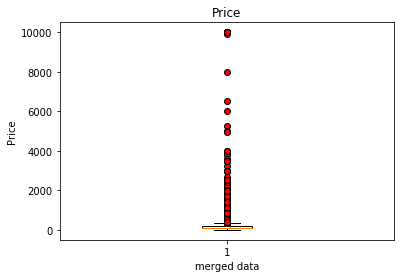

In [7]:
#create the boxplot graph to check the outliers in the price column
price_data = merged_data['price']
print(len(price_data))

marker = dict(markerfacecolor='r', marker='o')
plt.boxplot(price_data, flierprops=marker)

plt.title('Price')
plt.xlabel('merged data')
plt.ylabel('Price')
plt.show()

In [8]:
#calculate quartiles to find the upper bound value
quartiles = price_data.quantile([.25,.5,.75])
lowerq = quartiles.iloc[0]
upperq = quartiles.iloc[2]
iqr = upperq-lowerq
median = quartiles.iloc[1]
print()
print("--------------------------------------------------")
print(f":price")
print("--------------------------------------------------")
print(f"The lower quartile of occupancy is: {round(lowerq,2)}")
print(f"The upper quartile of occupancy is: {round(upperq,2)}")
print(f"The interquartile range of occupancy is: {round(iqr,2)}")
print(f"The median of occupancy is: {round(median,2)}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Values below {round(lower_bound,3)} could be outliers.")
print(f"Values above {round(upper_bound,3)} could be outliers.")
outliers = []

for volume in price_data:
    if volume < lower_bound or volume > upper_bound:
        outliers.append(volume)
        
if len(outliers) == 0:
    print("There is no potetional outlier.")
else:
    print(f"The number of potentional outliers: {len(outliers)}")
    


--------------------------------------------------
:price
--------------------------------------------------
The lower quartile of occupancy is: 75.0
The upper quartile of occupancy is: 175.0
The interquartile range of occupancy is: 100.0
The median of occupancy is: 109.0
Values below -75.0 could be outliers.
Values above 325.0 could be outliers.
The number of potentional outliers: 2009


In [9]:
#check the data after dropping the outliers of price data
data_without_outliers = merged_data.loc[merged_data['price']<=upper_bound]
print(len(data_without_outliers['id']))
city_data=data_without_outliers.groupby('city').count()
city_data=city_data.sort_values(by='id',ascending=False)
city_data


22609


,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year
city,,,,,,,,,,,,,,,,,,,,,
Los Angeles,16242,16242,13386,13386,16068,16068,16242,16226,16242,16242,...,16242,16242,16242,16232,16232,16222,16222,16241,16242,16242
Long Beach,1454,1454,1241,1241,1435,1435,1454,1454,1454,1454,...,1454,1454,1454,1452,1452,1451,1451,1454,1454,1454
Santa Monica,850,850,802,802,846,846,850,850,850,850,...,850,850,850,850,850,850,850,850,850,850
West Hollywood,596,596,478,478,590,590,596,596,596,596,...,596,596,596,595,595,595,594,596,596,596
Pasadena,500,500,444,444,498,498,500,500,500,500,...,500,500,500,500,500,500,500,500,500,500
Glendale,436,436,378,378,435,435,436,436,436,436,...,436,436,436,436,436,436,436,436,436,436
Inglewood,403,403,380,380,402,402,403,403,403,403,...,403,403,403,403,403,403,403,403,403,403
Beverly Hills,331,331,279,279,318,318,331,331,331,331,...,331,331,331,331,331,331,331,331,331,331
Burbank,312,312,273,273,303,303,312,312,312,312,...,312,312,312,312,312,312,312,312,312,312


In [10]:
#get the top 10 cities of id counts
city_index = city_data.index.tolist()
top_10_cities = [city_index[n] for n in range(10)]
top_10_cities

['Los Angeles',
 'Long Beach',
 'Santa Monica',
 'West Hollywood',
 'Pasadena',
 'Glendale',
 'Inglewood',
 'Beverly Hills',
 'Burbank',
 'Alhambra']

In [11]:
#drop the outliers of price and select top 10 cities of id counts
#store the data to selected_data
selected_data = merged_data.loc[(merged_data['price']<=upper_bound)]
selected_data = selected_data.loc[(merged_data['city']=='Los Angeles')|(merged_data['city']=='Long Beach')|(merged_data['city']=='Santa Monica')|(merged_data['city']=='West Hollywood')|(merged_data['city']=='Pasadena')|(merged_data['city']=='Glendale')|(merged_data['city']=='Inglewood')|(merged_data['city']=='Beverly Hills')|(merged_data['city']=='Burbank')|(merged_data['city']=='Alhambra')]
selected_data = selected_data.sort_values(by='city')
selected_data = selected_data.reset_index(drop=True)
#selected_data.to_csv("selected_data.csv")
selected_data

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year
0,30676319,65424736,within an hour,100%,t,5.0,"Alhambra, CA, United States",Alhambra,Alhambra,Other Cities,...,145,24,98.0,10.0,10.0,10.0,10.0,2.07,11.0,2019.0
1,15990773,42409124,within a few hours,90%,t,4.0,"Alhambra, CA, United States",Alhambra,Alhambra,Other Cities,...,364,33,95.0,10.0,10.0,10.0,10.0,0.90,11.0,2019.0
2,7023661,5493138,NaN,NaN,t,2.0,"Alhambra, CA, United States",Alhambra,Alhambra,Other Cities,...,0,14,100.0,10.0,10.0,10.0,10.0,0.27,11.0,2019.0
3,15990734,42409124,within a few hours,90%,t,4.0,"Alhambra, CA, United States",Alhambra,Alhambra,Other Cities,...,347,22,94.0,10.0,9.0,10.0,10.0,0.62,11.0,2019.0
4,15990662,42409124,within a few hours,90%,t,4.0,"Alhambra, CA, United States",Alhambra,Alhambra,Other Cities,...,364,19,97.0,10.0,9.0,10.0,10.0,0.53,11.0,2019.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21395,30344160,73832826,within a few hours,100%,t,3.0,"West Hollywood, CA, United States",West Hollywood,West Hollywood,Other Cities,...,154,3,100.0,10.0,10.0,10.0,10.0,0.29,27938.0,2019.0
21396,30344766,73832826,within a few hours,100%,t,3.0,"West Hollywood, CA, United States",West Hollywood,West Hollywood,Other Cities,...,180,2,100.0,10.0,10.0,10.0,10.0,0.20,27938.0,2019.0
21397,17156200,38513766,within an hour,100%,t,2.0,"West Hollywood, CA, United States",West Hollywood,West Hollywood,Other Cities,...,90,14,99.0,10.0,10.0,10.0,10.0,0.43,27938.0,2019.0
21398,20848261,149609987,within an hour,100%,f,1.0,"West Hollywood, CA, United States",West Hollywood,West Hollywood,Other Cities,...,133,8,95.0,10.0,9.0,10.0,10.0,0.34,27938.0,2019.0


In [12]:
#select 1000 randam data from the selected_data
random_indexs = []
#sample size: 1000 -> population size: 21400, confidence level: 95%, merge of error: 3%
#based on the calculation on "https://www.surveymonkey.com/mp/sample-size-calculator/"
random_indexs = np.random.randint(0,len(selected_data['id']),1000)
random_indexs

array([ 2817,  4715, 12986,  4216, 11044, 15650,  8023,  7880,  9479,
       14665, 19733,  6003,  8408, 14655, 14553,  5549, 11673,   798,
       11804,  6504,  2813, 18511, 17408, 13699, 12222,  6239,  8863,
       14088, 14307,  2832, 10637, 14796, 17945,   730,  2167,   199,
        2865,  2740, 14078, 17592,  6919, 18812,  3381, 21196, 20782,
       10423, 13261, 12236,  2150,   344, 20521, 13207,  8051,   558,
       15740,   162,  9914,  2899,  3359,  7700, 18824, 15166,  1368,
         746, 17832,  3250, 16345,  8648,  3761, 14253,  9035,  7860,
       15611, 18117,  1829, 12650,  8288, 18727, 13234, 14299, 11169,
        2720, 20842,  1232, 18705, 14290,  4627, 18336, 19090,  1811,
       18379, 13157,    51, 20759,  3848, 12411,  1041, 19101, 19412,
        3756,  9102,  4767, 20001, 10961, 19639, 11803,  4331, 15852,
        6433,  2574,  3762,  3267,   347,  4257,  5573, 11250,  7833,
       18711, 15345,  4042, 16982, 12390,  3347,   848,  1219,  8083,
         564, 20920,

In [13]:
#show how many rows for each city in the sample
random_data = selected_data.iloc[random_indexs,:]
random_data.groupby('city').count()

,id,host_id,host_response_time,host_response_rate,host_is_superhost,host_listings_count,street,neighbourhood,neighbourhood_cleansed,neighbourhood_group_cleansed,...,availability_365,number_of_reviews,review_scores_rating,review_scores_accuracy,review_scores_cleanliness,review_scores_checkin,review_scores_location,reviews_per_month,crime,year
city,,,,,,,,,,,,,,,,,,,,,
Alhambra,10,10,10,10,10,10,10,10,10,10,...,10,10,10,10,10,10,10,10,10,10
Beverly Hills,17,17,15,15,16,16,17,17,17,17,...,17,17,17,17,17,17,17,17,17,17
Burbank,14,14,11,11,14,14,14,14,14,14,...,14,14,14,14,14,14,14,14,14,14
Glendale,21,21,18,18,21,21,21,21,21,21,...,21,21,21,21,21,21,21,21,21,21
Inglewood,24,24,23,23,24,24,24,24,24,24,...,24,24,24,24,24,24,24,24,24,24
Long Beach,78,78,67,67,76,76,78,78,78,78,...,78,78,78,78,78,78,78,78,78,78
Los Angeles,762,762,629,629,757,757,762,761,762,762,...,762,762,762,762,762,761,761,762,762,762
Pasadena,20,20,18,18,20,20,20,20,20,20,...,20,20,20,20,20,20,20,20,20,20
Santa Monica,31,31,30,30,31,31,31,31,31,31,...,31,31,31,31,31,31,31,31,31,31


In [14]:
#export the sample data to csv file
random_data.to_csv("random_top_10_cities_data.csv",index=False)